In [1]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

In [3]:
traindir = './image/hotdog/train'
testdir ='./image/hotdog/test'

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
train_data_gen = image_gen.flow_from_directory(traindir,batch_size=32,target_size=(224,224),shuffle=True)
test_data_gen = image_gen.flow_from_directory(testdir,batch_size=32,target_size=(224,224),shuffle=True)

Found 2367 images belonging to 2 classes.
Found 835 images belonging to 2 classes.


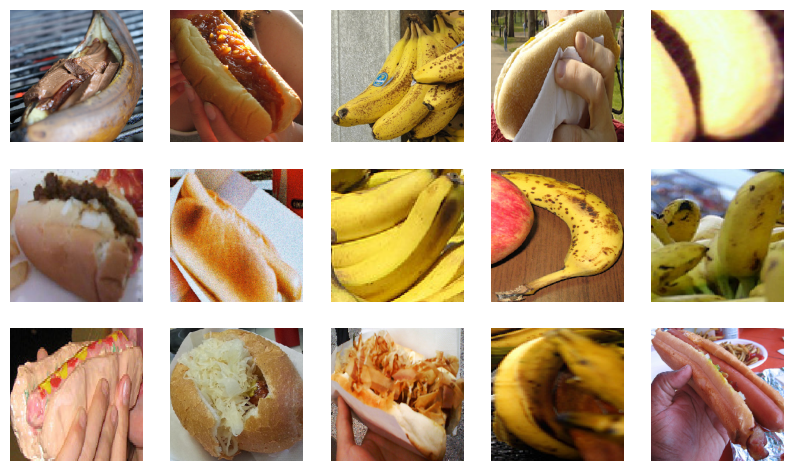

In [4]:
image,label = next(train_data_gen)

plt.figure(figsize=(10,10))
for n in range(15):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(image[n])
    plt.axis('off')

In [7]:
ResNet50 = tf.keras.applications.ResNet50(weights='imagenet',input_shape=(224,224,3))
for layer in ResNet50.layers:
    layer.trainable=False
net = tf.keras.models.Sequential()
net.add(ResNet50)
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(2,activation="sigmoid"))

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 2cb95161c43110f7111970584f804107 so we will re-download the data.
102967424/102967424 [==============================] - 39s 0us/step


In [8]:
net.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])
net.fit(train_data_gen,steps_per_epoch=10,epochs=3,batch_size=32,validation_data=test_data_gen,validation_steps=10)

Epoch 1/3


2023-04-11 20:50:34.352141: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 15s 1s/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6935 - val_accuracy: 0.4688
Epoch 2/3
10/10 [==============================] - 14s 1s/step - loss: 0.6923 - accuracy: 0.5500 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 3/3
10/10 [==============================] - 14s 1s/step - loss: 0.6914 - accuracy: 0.5737 - val_loss: 0.6937 - val_accuracy: 0.4875
